In [2]:
import os
import pandas as pd
from functions import boxplot_results_context
from functions import boxplot_results
from functions import naive_recommender
from functions import lineplot_results
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


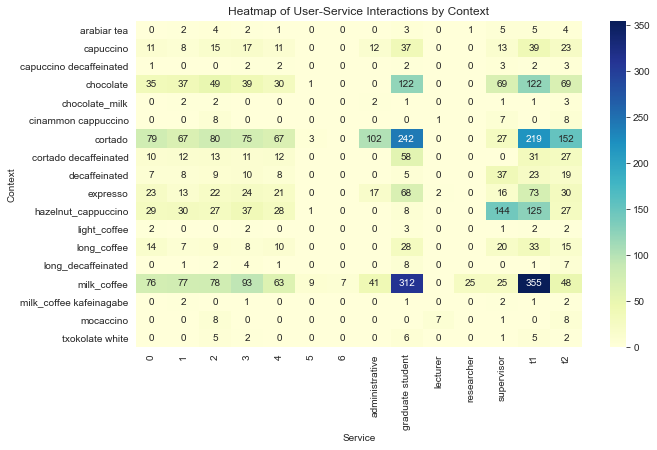

In [5]:
df=pd.read_csv("filesToProcess/query-result-allContextChanged.csv")

# Create a pivot table to prepare the data for heatmap
pivot_table = df.pivot_table(index='service', columns='contextValue', aggfunc='size', fill_value=0)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of User-Service Interactions by Context')
plt.xlabel('Service')
plt.ylabel('Context')
plt.show()

contextValue              t1   t2
service                          
arabiar tea                5    4
capuccino                 39   23
capuccino decaffeinated    2    3
chocolate                122   69
chocolate_milk             1    3
cinammon cappuccino        0    8
cortado                  219  152
cortado decaffeinated     31   27
decaffeinated             23   19
expresso                  73   30
hazelnut_cappuccino      125   27
light_coffee               2    2
long_coffee               33   15
long_decaffeinated         1    7
milk_coffee              355   48
milk_coffee kafeinagabe    1    2
mocaccino                  0    8
txokolate white            5    2


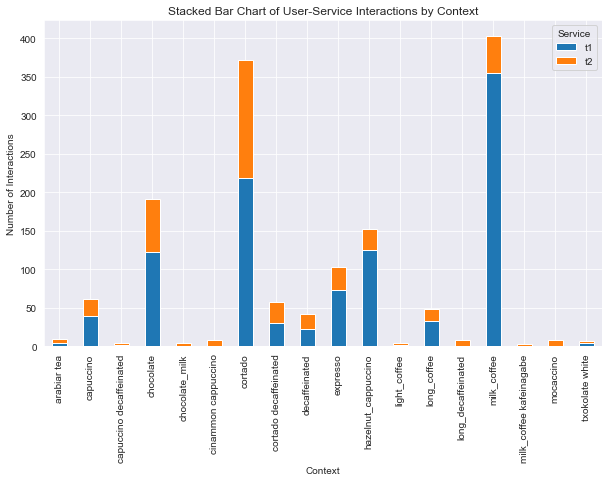

In [6]:
# Group data by Context and Service and count occurrences
df1=df[df['contextValue'].isin(['t1', 't2'])]

grouped_data = df1.groupby(['service','contextValue']).size().unstack(fill_value=0)

print(grouped_data)
# Create stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of User-Service Interactions by Context')
plt.xlabel('Context')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=90)
plt.legend(title='Service')
plt.show()

contextValue              t1   t2
service                          
arabiar tea                5   19
capuccino                 39   23
capuccino decaffeinated   17   18
chocolate                122   69
chocolate_milk            16   18
cinammon cappuccino       15    8
cortado                  219  152
cortado decaffeinated     31   27
decaffeinated             23   19
expresso                  73   30
hazelnut_cappuccino      125   27
light_coffee              17   17
long_coffee               33   15
long_decaffeinated        16    7
milk_coffee              355   48
milk_coffee kafeinagabe   16   17
mocaccino                 15    8
txokolate white            5   17


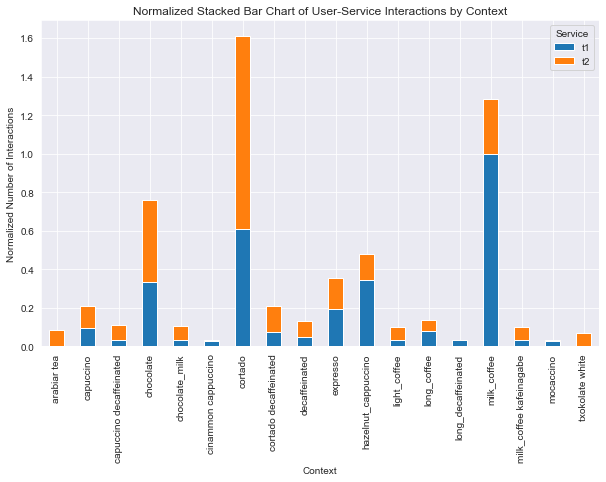

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Group data by Context and Service and count occurrences
df1 = df[df['contextValue'].isin(['t1', 't2'])]

grouped_data = df1.groupby(['service','contextValue']).size().unstack(fill_value=0)
grouped_data = grouped_data.applymap(lambda x: x+15 if x < 5 else x)



print(grouped_data)

# Apply min-max scaling to normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(grouped_data)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=grouped_data.columns, index=grouped_data.index)

# Create stacked bar chart
ax = normalized_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Stacked Bar Chart of User-Service Interactions by Context')
plt.xlabel('Context')
plt.ylabel('Normalized Number of Interactions')

plt.legend(title='Service')
plt.show()


contextValue              0   1   2   3   4
service                                    
arabiar tea               8  16  24  16  12
capuccino                11   8  15  17  11
capuccino decaffeinated  12   8   8  16  16
chocolate                35  37  49  39  30
chocolate_milk            8  16  16   8   8
cinammon cappuccino       8   8   8   8   8
cortado                  79  67  80  75  67
cortado decaffeinated    10  12  13  11  12
decaffeinated            36   8   9  10   8
expresso                 23  13  22  24  21
hazelnut_cappuccino      29  30  27  37  28
light_coffee             16   8   8  16   8
long_coffee              14  36   9   8  10
long_decaffeinated        8  12  16  24  12
milk_coffee              76  77  78  93  63
milk_coffee kafeinagabe   8  16   8  12   8
mocaccino                 8   8   8   8   8
txokolate white           8   8  28  16   8
contextValue              t1   t2
service                          
arabiar tea               28   24
capuccino         

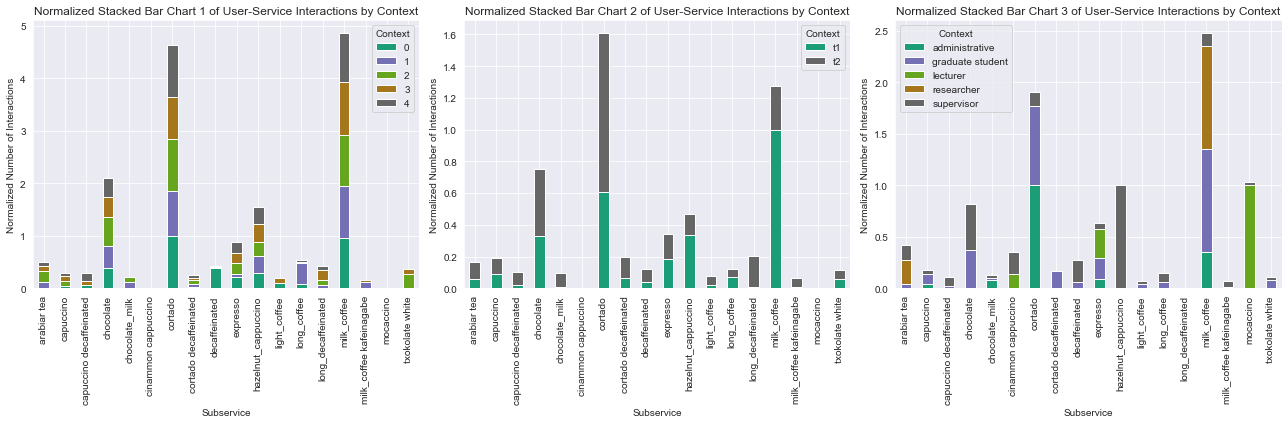

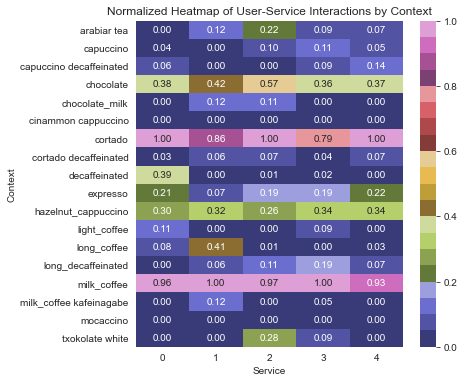

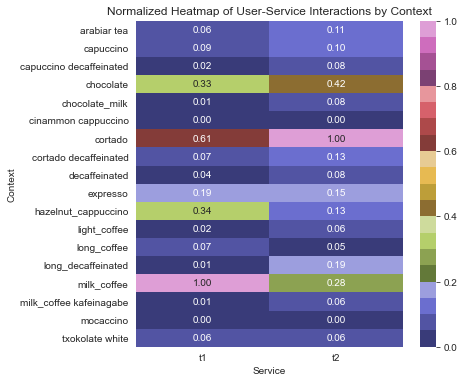

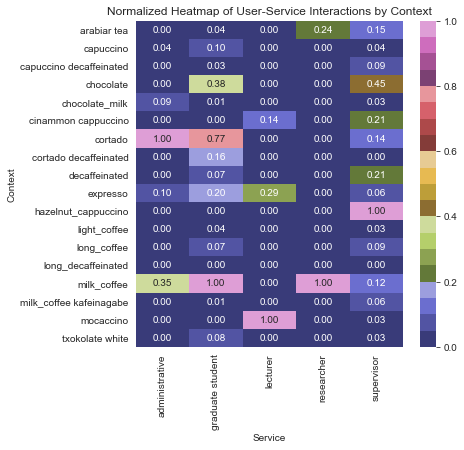

In [12]:
from sklearn.preprocessing import MinMaxScaler

def normalizer(grouped_data):
    # Apply min-max scaling to normalize the data
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(grouped_data)
    # Convert the normalized data back to a DataFrame
    normalized_df = pd.DataFrame(normalized_data, columns=grouped_data.columns, index=grouped_data.index)
    return normalized_df

# Group data by Context and Service and count occurrences
dfWeekDay = df[df['contextValue'].isin(['0', '1','2','3','4'])]
dfShift = df[df['contextValue'].isin(['t1', 't2'])]
dfroles = df[df['contextValue'].isin(['graduate student', 'administrative','supervisor','researcher','lecturer'])]


grouped_data_Weekday = dfWeekDay.groupby(['service','contextValue']).size().unstack(fill_value=0)
grouped_data_Weekday = grouped_data_Weekday.applymap(lambda x: (x+2)*4 if x < 8 else x)
print(grouped_data_Weekday)
grouped_data_Shift = dfShift.groupby(['service','contextValue']).size().unstack(fill_value=0)
grouped_data_Shift = grouped_data_Shift.applymap(lambda x: (x+2)*4 if x < 8 else x)
print(grouped_data_Shift)

grouped_data_Roles = dfroles.groupby(['service','contextValue']).size().unstack(fill_value=0)
grouped_data_Roles = grouped_data_Roles.applymap(lambda x: (x+2)*4 if x < 8 else x)
print(grouped_data_Roles)

n=[]
n.append(normalizer(grouped_data_Weekday))
n.append(normalizer(grouped_data_Shift))
n.append(normalizer(grouped_data_Roles))

# Create subplots
fig, axs = plt.subplots(1, len(n), figsize=(18, 6))

# Iterate over each DataFrame in the list n
for i, normalized_df in enumerate(n):
    # Create stacked bar chart for each DataFrame
    ax = normalized_df.plot(kind='bar', stacked=True, ax=axs[i],cmap='Dark2')
    ax.set_title(f'Normalized Stacked Bar Chart {i+1} of User-Service Interactions by Context')
    ax.set_xlabel('Subservice')
    ax.set_ylabel('Normalized Number of Interactions')
    ax.legend(title='Context')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

for normalized_df in n:
    # Create a heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(normalized_df, cmap='tab20b', annot=True, fmt=".2f")
    plt.title('Normalized Heatmap of User-Service Interactions by Context')
    plt.xlabel('Service')
    plt.ylabel('Context')
    plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

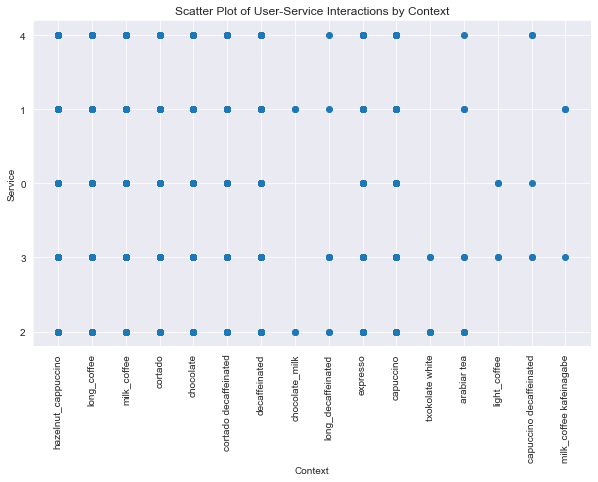

In [12]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
df1 = df[df['contextValue'].isin(['0', '1','2','3','4'])]

plt.scatter(df1['service'], df1['contextValue'])
plt.title('Scatter Plot of User-Service Interactions by Context')
plt.xlabel('Context')
plt.ylabel('Service')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

*Report without Contextual Data*

[<matplotlib.patches.Rectangle object at 0x0000019F7CFABC70>, <matplotlib.patches.Rectangle object at 0x0000019F7CFABE80>, <matplotlib.patches.Rectangle object at 0x0000019F7CFAB9A0>] None [0.66495726 0.68888889 0.6       ] vertical
[<matplotlib.patches.Rectangle object at 0x0000019F7CF65FA0>, <matplotlib.patches.Rectangle object at 0x0000019F7D3B2CD0>, <matplotlib.patches.Rectangle object at 0x0000019F7CF654C0>] None [0.58269231 0.52884615 0.57307692] vertical
[<matplotlib.patches.Rectangle object at 0x0000019F7CF516D0>, <matplotlib.patches.Rectangle object at 0x0000019F7CF51550>, <matplotlib.patches.Rectangle object at 0x0000019F7CF51C40>] None [0.52735043 0.49188034 0.55641026] vertical


IndexError: index 3 is out of bounds for axis 1 with size 3

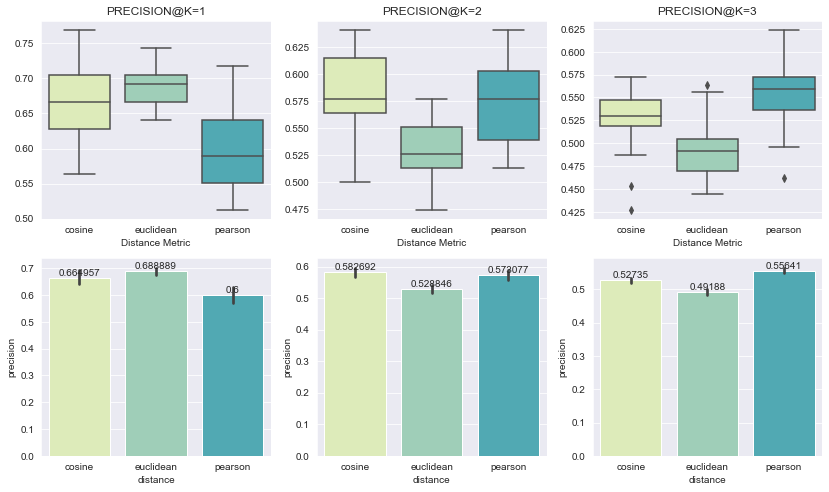

In [8]:
filenames=[]
for filename in os.listdir("results/withoutContext"):
    if os.path.isfile(os.path.join("results/withoutContext", filename)):
        if "False" in filename:
            filenames.append(filename)
if len(filenames)>0:
    boxplot_results(filenames,"precision","results/withoutContext/")

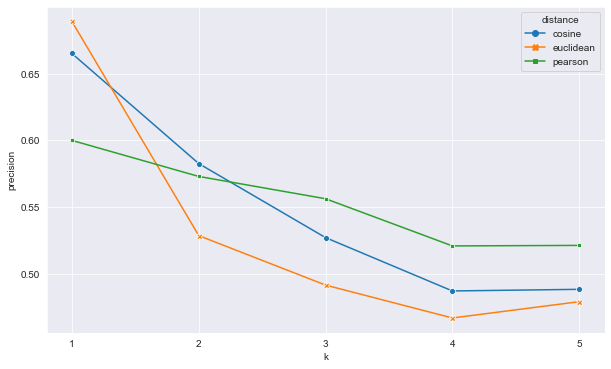

In [3]:
lineplot_results(filenames,"precision","results/withoutContext/")


[<matplotlib.patches.Rectangle object at 0x000001EA24515DC0>, <matplotlib.patches.Rectangle object at 0x000001EA24519280>, <matplotlib.patches.Rectangle object at 0x000001EA245194C0>] None [0.11417464 0.13289882 0.10155427] vertical
[<matplotlib.patches.Rectangle object at 0x000001EA245617C0>, <matplotlib.patches.Rectangle object at 0x000001EA24561B50>, <matplotlib.patches.Rectangle object at 0x000001EA24561D60>] None [0.19542365 0.19897645 0.19735252] vertical
[<matplotlib.patches.Rectangle object at 0x000001EA248AD4C0>, <matplotlib.patches.Rectangle object at 0x000001EA24897C40>, <matplotlib.patches.Rectangle object at 0x000001EA248A2970>] None [0.19143318 0.19605939 0.19044854] vertical
[<matplotlib.patches.Rectangle object at 0x000001EA248B5E80>, <matplotlib.patches.Rectangle object at 0x000001EA248FE340>, <matplotlib.patches.Rectangle object at 0x000001EA248FE550>] None [0.2058508  0.21250238 0.20300535] vertical
[<matplotlib.patches.Rectangle object at 0x000001EA2493DA90>, <matpl

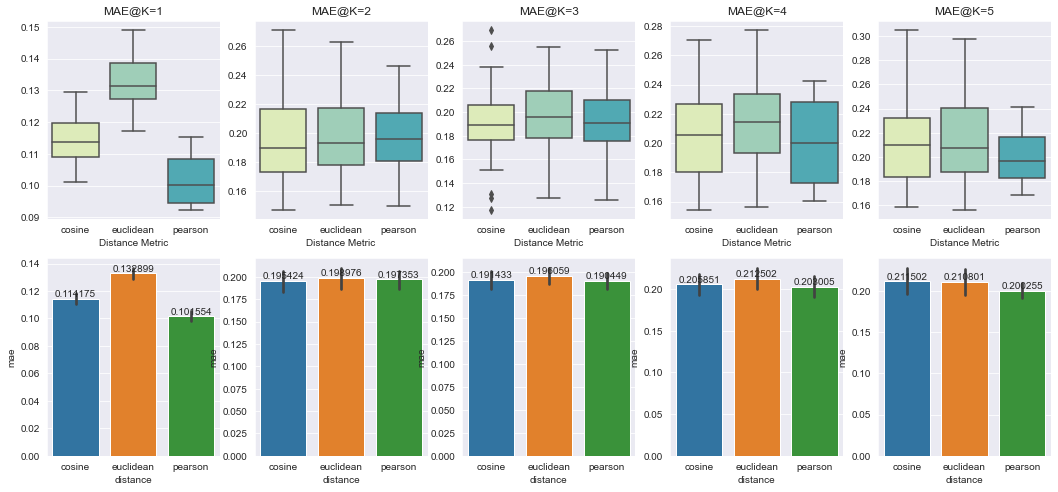

In [5]:
filenames=[]
for filename in os.listdir("results/withoutContext"):
    if os.path.isfile(os.path.join("results/withoutContext", filename)):
        if "False" in filename:
            filenames.append(filename)
if len(filenames)>0:
    boxplot_results(filenames,"mae","results/withoutContext/")

*Naive recommender*

In [5]:
#Naive recommender
precisions=[]
times=20
for i in range(times):
    test_df, training_df, model_df, users=naive_recommender("filesToProcess/query-result.csv",0.30)
    model_dic={}
    for i, row in model_df.iterrows():
        model_dic.setdefault(row.user,[])
        model_dic[row.user].append(row.service)
    correct=0
    total=test_df.shape[0]
    for i, row in test_df.iterrows():
        if row.user in model_dic:
            #print(row.user, row.service, model_dic[row.user])
            if row.service in model_dic[row.user]:
                correct+=1
    precision=correct/total
    precisions.append(precision)
if times>0:
    print("*********************************************************************")
    print("Naive approach baseline Precision@1", sum(precisions)/len(precisions))

*********************************************************************
Naive approach baseline Precision@1 0.5829039812646369


boxplot
1                                                  file   distance  k  \
6   results_ratings_t1-doctoralstudent_False_2023-...     cosine  1   
7   results_ratings_t1-doctoralstudent_False_2023-...  euclidean  1   
8   results_ratings_t1-doctoralstudent_False_2023-...    pearson  1   
15  results_ratings_t1-supervisor_False_2023-05-03...     cosine  1   
16  results_ratings_t1-supervisor_False_2023-05-03...  euclidean  1   
17  results_ratings_t1-supervisor_False_2023-05-03...    pearson  1   
24  results_ratings_t2-doctoralstudent_False_2023-...     cosine  1   
25  results_ratings_t2-doctoralstudent_False_2023-...  euclidean  1   
26  results_ratings_t2-doctoralstudent_False_2023-...    pearson  1   
33  results_ratings_t2-supervisor_False_2023-05-03...     cosine  1   
34  results_ratings_t2-supervisor_False_2023-05-03...  euclidean  1   
35  results_ratings_t2-supervisor_False_2023-05-03...    pearson  1   

    precision    recall       mrr       mae      rmse  
6    0.711

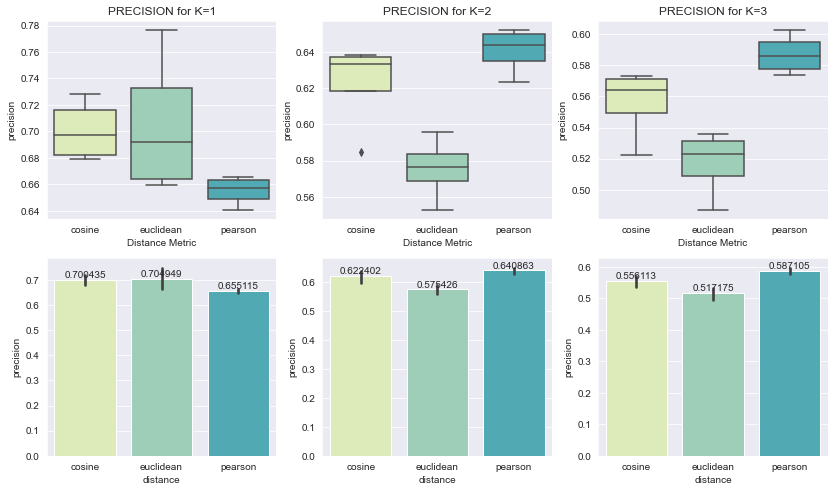

In [9]:
filenames=[]
for filename in os.listdir("results/withContextFinal"):
    if os.path.isfile(os.path.join("results/withContextFinal", filename)):
        if "False" in filename:
            filenames.append(filename)
if len(filenames)>0:
    boxplot_results_context(filenames,"precision","results/withContextFinal/")


*using min-max scaler*

                                                 file   distance  k  \
0   results_ratings_t1-doctoralstudent_2023-05-02_...     cosine  2   
1   results_ratings_t1-doctoralstudent_2023-05-02_...  euclidean  2   
2   results_ratings_t1-doctoralstudent_2023-05-02_...    pearson  2   
3   results_ratings_t1-doctoralstudent_2023-05-02_...     cosine  3   
4   results_ratings_t1-doctoralstudent_2023-05-02_...  euclidean  3   
5   results_ratings_t1-doctoralstudent_2023-05-02_...    pearson  3   
6   results_ratings_t1-doctoralstudent_2023-05-02_...     cosine  1   
7   results_ratings_t1-doctoralstudent_2023-05-02_...  euclidean  1   
8   results_ratings_t1-doctoralstudent_2023-05-02_...    pearson  1   
9   results_ratings_t1-supervisor_2023-05-02_19-23...     cosine  2   
10  results_ratings_t1-supervisor_2023-05-02_19-23...  euclidean  2   
11  results_ratings_t1-supervisor_2023-05-02_19-23...    pearson  2   
12  results_ratings_t1-supervisor_2023-05-02_19-25...     cosine  3   
13  re

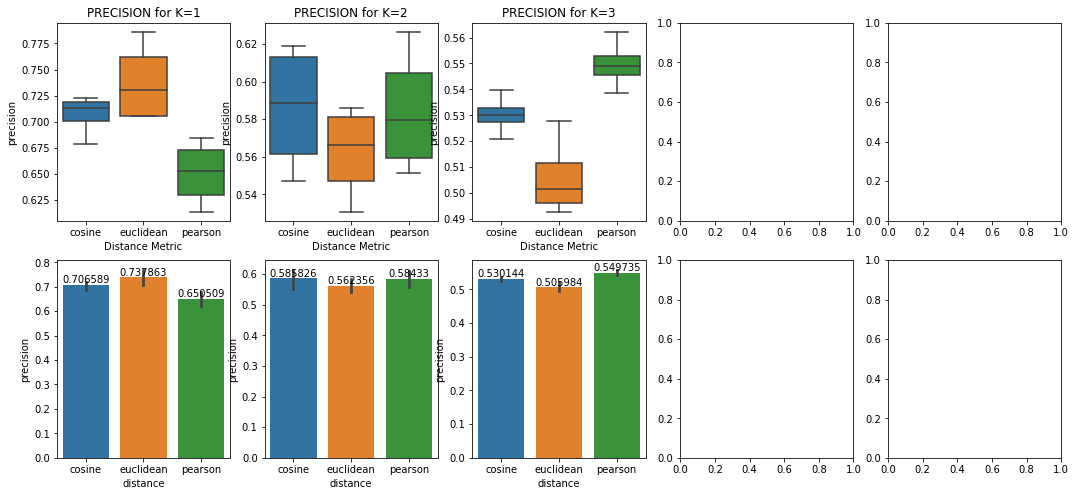

In [3]:
filenames=[]
for filename in os.listdir("results/with-0.1"):
    if os.path.isfile(os.path.join("results/with-0.1", filename)):
        if "False" in filename:
            filenames.append(filename)
if len(filenames)>0:
    boxplot_results_context(filenames,"precision","results/with-0.1/")

MRR (measures the average ranking of the first relevant item)

[<matplotlib.patches.Rectangle object at 0x000001EC832361C0>, <matplotlib.patches.Rectangle object at 0x000001EC832364C0>, <matplotlib.patches.Rectangle object at 0x000001EC832366D0>] None [0.11741482 0.1321155  0.0942742 ] vertical
[<matplotlib.patches.Rectangle object at 0x000001EC832F3A30>, <matplotlib.patches.Rectangle object at 0x000001EC832F3D30>, <matplotlib.patches.Rectangle object at 0x000001EC832F3F40>] None [0.10984287 0.12277192 0.09177102] vertical
[<matplotlib.patches.Rectangle object at 0x000001EC83A4B760>, <matplotlib.patches.Rectangle object at 0x000001EC83A356A0>, <matplotlib.patches.Rectangle object at 0x000001EC83A4B2E0>] None [0.11175229 0.12383368 0.09569151] vertical


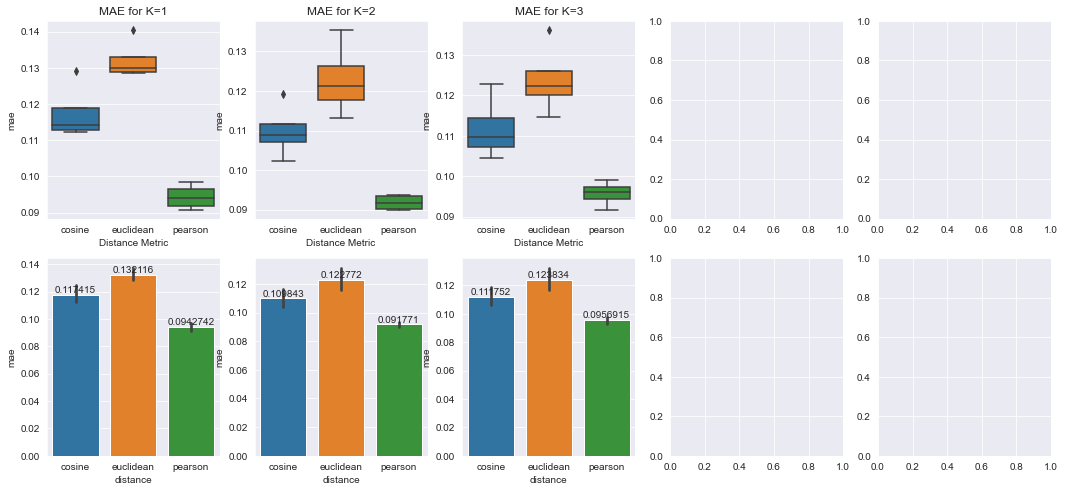

In [12]:
filenames=[]
for filename in os.listdir("results/withContextFinal"):
    if os.path.isfile(os.path.join("results/withContextFinal", filename)):
        if "False" in filename:
            filenames.append(filename)
if len(filenames)>0:
    boxplot_results_context(filenames,"mae","results/withContextFinal/")

boxplot
1                                                  file   distance  k  \
6   results_ratings_t1-doctoralstudent_False_2023-...     cosine  1   
7   results_ratings_t1-doctoralstudent_False_2023-...  euclidean  1   
8   results_ratings_t1-doctoralstudent_False_2023-...    pearson  1   
15  results_ratings_t1-supervisor_False_2023-05-03...     cosine  1   
16  results_ratings_t1-supervisor_False_2023-05-03...  euclidean  1   
17  results_ratings_t1-supervisor_False_2023-05-03...    pearson  1   
24  results_ratings_t2-doctoralstudent_False_2023-...     cosine  1   
25  results_ratings_t2-doctoralstudent_False_2023-...  euclidean  1   
26  results_ratings_t2-doctoralstudent_False_2023-...    pearson  1   
33  results_ratings_t2-supervisor_False_2023-05-03...     cosine  1   
34  results_ratings_t2-supervisor_False_2023-05-03...  euclidean  1   
35  results_ratings_t2-supervisor_False_2023-05-03...    pearson  1   

    precision    recall       mrr       mae      rmse  
6    0.711

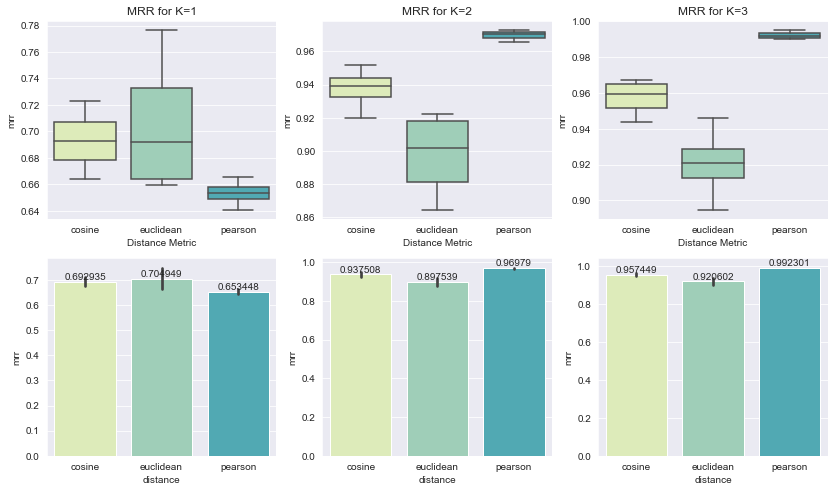

In [2]:
filenames=[]
for filename in os.listdir("results/withContextFinal"):
    if os.path.isfile(os.path.join("results/withContextFinal", filename)):
        if "False" in filename:
            filenames.append(filename)
if len(filenames)>0:
    boxplot_results_context(filenames,"mrr","results/withContextFinal/")

In [4]:
filenames=[]
for filename in os.listdir("results/"):
    if os.path.isfile(os.path.join("results/", filename)):
        if "True" in filename:
            filenames.append(filename)
if len(filenames)>0:
    boxplot_results(filenames,"precision","results/")

[<matplotlib.patches.Rectangle object at 0x000001453A496340>, <matplotlib.patches.Rectangle object at 0x000001453A496640>, <matplotlib.patches.Rectangle object at 0x000001453A496850>] None [0.70026415 0.70203453 0.66009365] vertical
[<matplotlib.patches.Rectangle object at 0x000001453A00EDC0>, <matplotlib.patches.Rectangle object at 0x000001453A00EF70>, <matplotlib.patches.Rectangle object at 0x000001453A0042B0>] None [0.62008999 0.57880315 0.62798127] vertical
[<matplotlib.patches.Rectangle object at 0x000001453A519940>, <matplotlib.patches.Rectangle object at 0x000001453A502700>, <matplotlib.patches.Rectangle object at 0x000001453A519C70>] None [0.55737777 0.52137993 0.58016372] vertical


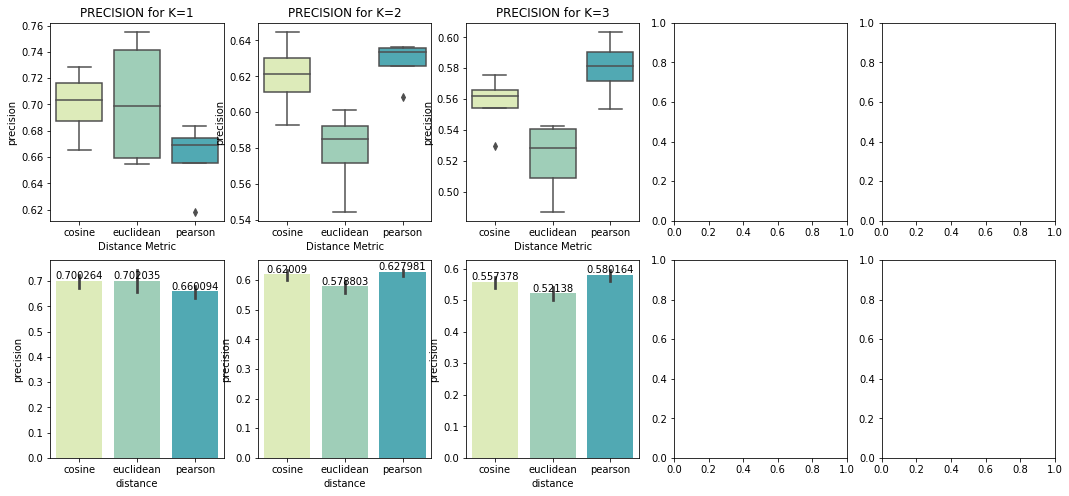

In [3]:
filenames=[]
for filename in os.listdir("results/"):
    if os.path.isfile(os.path.join("results/", filename)):
        if "False" in filename:
            filenames.append(filename)
if len(filenames)>0:
    boxplot_results_context(filenames,"precision","results/")